# Explore Zomato Reviews

Gagasan dasar untuk menganalisis dataset Zomato adalah untuk mendapatkan gagasan yang adil tentang faktor-faktor yang mempengaruhi pembentukan berbagai jenis restoran di berbagai tempat di Bangalore, peringkat agregat setiap restoran, Bangalore menjadi salah satu kota yang memiliki lebih dari 12.000 restoran dengan restoran yang menyajikan hidangan dari seluruh dunia. Dengan pembukaan restoran baru setiap hari, industri belum jenuh dan permintaan meningkat dari hari ke hari. Meskipun permintaan meningkat, namun sulit bagi restoran baru untuk bersaing dengan restoran yang sudah mapan. Sebagian besar dari mereka menyajikan makanan yang sama. Bangalore menjadi ibu kota IT di India. Sebagian besar orang di sini bergantung terutama pada makanan di restoran karena mereka tidak punya waktu untuk memasak sendiri. Dengan permintaan restoran yang begitu besar, penting untuk mempelajari demografi lokasi.

Jenis makanan apa yang lebih populer di suatu daerah.
Apakah seluruh wilayah menyukai makanan vegetarian. Jika ya maka apakah daerah tersebut dihuni oleh sekte orang tertentu misalnya. Jain, Marwaris, Gujarat yang sebagian besar vegetarian. Jenis analisis ini dapat dilakukan dengan menggunakan data, dengan mempelajari faktor-faktor seperti
- Lokasi restoran
- Perkiraan Harga makanan berdasarkan restoran bertema atau tidak
- Wilayah mana dari kota itu yang menyajikan masakan dengan jumlah restoran maksimum
- Kebutuhan orang-orang yang berjuang untuk mendapatkan masakan terbaik dari lingkungan
- Lingkungan khusus yang terkenal dengan makanannya sendiri

Demi bahan pembelajaran, saya akan menjelaskan semua analisis menggunakan Bahasa Indonesia. Karena saya melihat terbatasnya pembahasan data science menggunakan Bahasa Indonesia maka dari itu, salah satu alasan saya adalah ini.

## Import Libraries

In [2]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=False)
from wordcloud import WordCloud
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
import folium
from tqdm import tqdm
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE
from gensim.models import word2vec
import nltk

## **Basic Data**

In [3]:
df = pd.read_csv('zomato.csv')
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [4]:
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [6]:
df.describe()

votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

In [7]:
listitem = []
for col in df.columns:
    listitem.append([col, df[col].dtype, df[col].isna().sum(),
                   round((df[col].isna().sum()/len(df[col]))*100,2),
                   df[col].nunique(), list(df[col].unique()[:2])])
    
dfDesc = pd.DataFrame(columns=['dataFeature', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listitem)
dfDesc

dataFeature dataType   null  nullPct  unique  \
0                           url   object      0     0.00   51717   
1                       address   object      0     0.00   11495   
2                          name   object      0     0.00    8792   
3                  online_order   object      0     0.00       2   
4                    book_table   object      0     0.00       2   
5                          rate   object   7775    15.03      64   
6                         votes    int64      0     0.00    2328   
7                         phone   object   1208     2.34   14926   
8                      location   object     21     0.04      93   
9                     rest_type   object    227     0.44      93   
10                   dish_liked   object  28078    54.29    5271   
11                     cuisines   object     45     0.09    2723   
12  approx_cost(for two people)   object    346     0.67      70   
13                 reviews_list   object      0     0.00   22513   
14                    menu_item   object      0     0.00    9098   
15              listed_in(type)   object      0     0.00       7   
16              listed_in(city)   object      0     0.00      30   

                                         uniqueSample  
0   [https://www.zomato.com/bangalore/jalsa-banash...  
1   [942, 21st Main Road, 2nd Stage, Banashankari,...  
2                             [Jalsa, Spice Elephant]  
3                                           [Yes, No]  
4                                           [Yes, No]  
5                                      [4.1/5, 3.8/5]  
6                                          [775, 787]  
7      [080 42297555\r\n+91 9743772233, 080 41714161]  
8                        [Banashankari, Basavanagudi]  
9                [Casual Dining, Cafe, Casual Dining]  
10  [Pasta, Lunch Buffet, Masala Papad, Paneer Laj...  
11  [North Indian, Mughlai, Chinese, Chinese, Nort...  
12                                         [800, 300]  
13  [[('Rated 4.0', 'RATED\n  A beautiful place to...  
14  [[], ['Chocolate Fantasy (Pack Of 5)', 'Pan Ca...  
15                                    [Buffet, Cafes]  
16                  [Banashankari, Bannerghatta Road]

## **EDA**

**Restaurant mana yang memiliki banyak outlet/cabang ?**

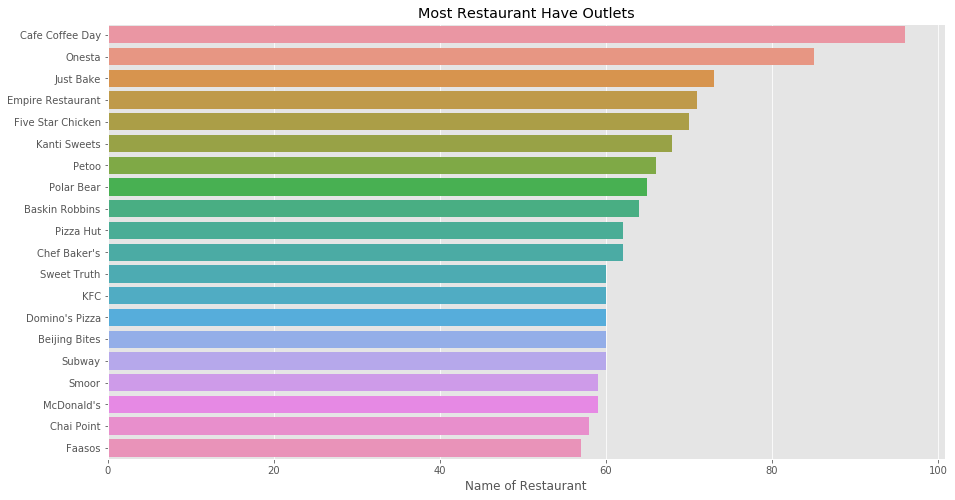

In [8]:
plt.figure(figsize=(15,8))
outlet = df['name'].value_counts()[:20]
sns.barplot(x=outlet, y=outlet.index)
plt.title('Most Restaurant Have Outlets')
plt.xlabel('Name of Restaurant')
plt.show()

**Objective:**

Berdasarkan grafik yang ditunjukan di atas, Cafe coffe dat, Onesta, dan Just Bake adalah yang paling banyak memiliki outlet di Bangalore dan sekitarnya.
Hal ini sangat menarik, nanti kita akan meneliti lebih jauh lagi masing-masing nama restaurant tersebut.

**Rasio restaurant yang memiliki service booking table**

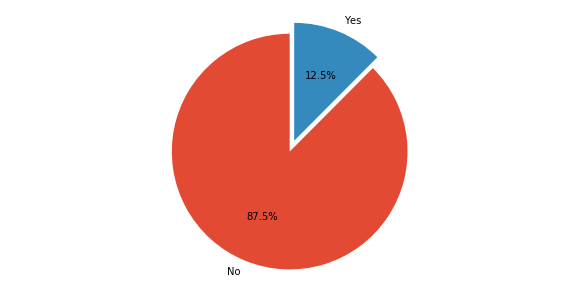

In [9]:
plt.figure(figsize=(10,5))
booking = df['book_table'].value_counts()
plt.pie(booking, labels=booking.index,autopct='%1.1f%%',explode=(0,0.1), startangle = 90)
plt.axis('equal')
plt.show()

**Objective:**

Ternyata restaurant yang tidak memiliki service untuk booking table lebih banyak.
Ada kemungkinan ini dikarenakan di India, restaurant yang bisa booking table hanya restaurant yang berbintang 5.
tapi ini masih asumsi, kita akan membuktikannya nanti.

**Restaurant yang menerima online order**

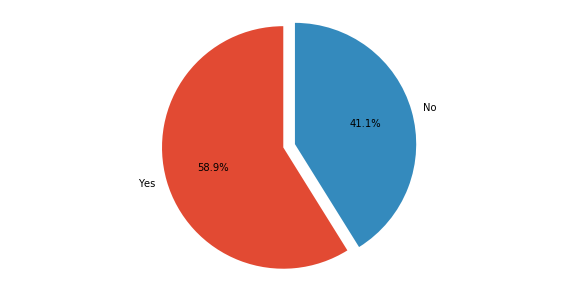

In [10]:
plt.figure(figsize=(10,5))
online = df['online_order'].value_counts()
plt.pie(online,labels=online.index,autopct='%1.1f%%',explode=(0,0.1), startangle = 90)
plt.axis('equal')
plt.show()

**Objective:**

Ada kemungkinan restaurant tidak dapat atau tidak mau membayar komisi kepada zomato . Asumsi berikutnya adalah restaurants ini tidak ingin bekerjasama dengan zomato untuk menyediakan online order.

**Kali ini kita akan lebih mengetahui tentang distribusi data rating**

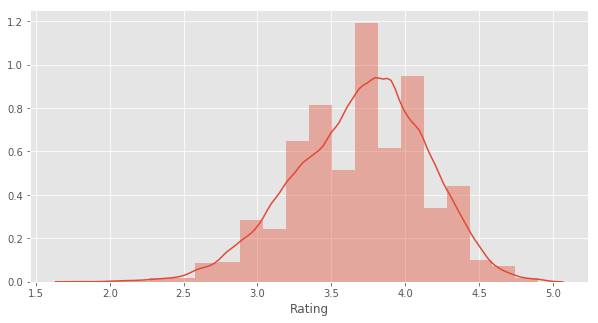

In [11]:
plt.figure(figsize=(10,5))
rating=df['rate'].dropna().apply(lambda i : float(i.split('/')[0]) if (len(i)>3)  else np.nan ).dropna()
sns.distplot(rating,bins=20)
plt.xlabel('Rating')
plt.show()

**Objective:**

Jika dikaitkan dengan ratio restaurant yang memiliki layanan table booking, maka asumsi yang tadi dibuat berdasarkan pernyataan yang ada di google, bahwa kebanyakan restaurant di India yang menerima reservasi adalah restaurant bintang 5 bisa dibuktikan.

**Cost vs Rating**

In [12]:
cost = df[['rate','approx_cost(for two people)','online_order']].dropna()
cost['rate'] = cost['rate'].apply(lambda x: float(x.split('/')[0]) if len(x)>3 else 0)
cost['approx_cost(for two people)'] = cost['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))

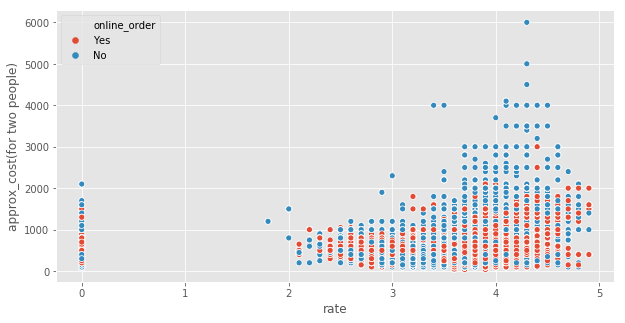

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=cost)
plt.show()

**Objective:**

Asumsi yang tadi dibangun sudah sangat jelas bisa dibuktikan. Sebab, berdasarkan scatter plot di atas, layanan online order ada, ketika rating sebuah restaurant semakin tinggi.

**Bagaimana distribusi harga untuk dua orang**

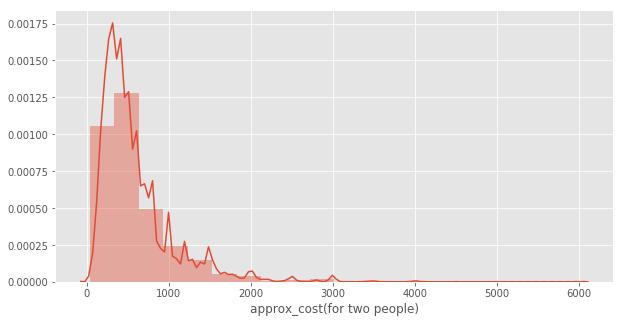

In [14]:
plt.figure(figsize=(10,5))
sns.distplot(cost['approx_cost(for two people)'],bins=20)
plt.show()

**Objective:**

Grafik menunjukkan bahwa distribusi dari cost_approx adalah ***left skewed***. Artinya, hampir 90% restaurant di Bangalore mematok harga dibawah 1000 INR.

**Apakah ada perbedaan antara restaurant yang menerima online order dan yang tidak ?**

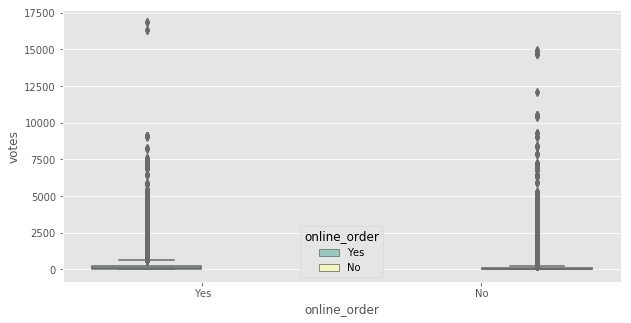

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x='online_order',y='votes',hue='online_order',data=df,palette='Set3')
plt.show()

**Objective:**

Jawabannya adalah Ya, terlihat ada perbedaan yang diberikan dari grafik di atas.
Dapat dilihat dari kedua sebaran data di atas, median jumlah suara untuk kedua kategori bervariasi. Restoran yang menerima pesanan online cenderung mendapat lebih banyak votes dari pelanggan karena ada opsi peringkat yang muncul setelah memesan melalui aplikasi zomato

**Tipe restaurany yang paling banyak diminati**

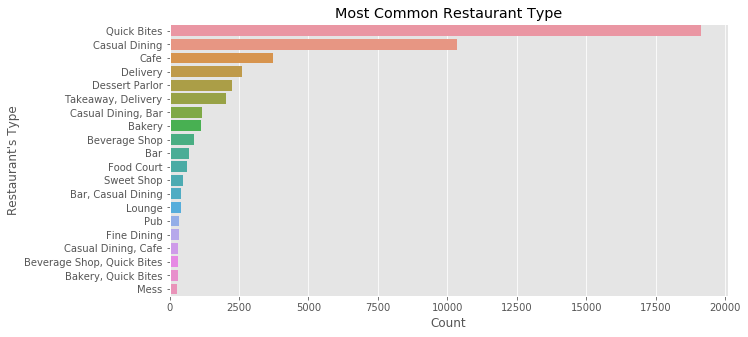

In [16]:
plt.figure(figsize=(10,5))
tipe = df['rest_type'].value_counts()[:20]
sns.barplot(x=tipe,y=tipe.index)
plt.title("Most Common Restaurant Type")
plt.ylabel("Restaurant's Type")
plt.xlabel('Count')
plt.show()

**Objective:**

Restoran tipe Quick Bites mendominasi. Hal ini dikarenakan Banglore dikenal sebagai ibukota teknologi di India, kebanyakan penduduknya sibuk dan memiliki kehidupan yang modern , oleh karena itu lebih suka restoran tipe Quick Bites.

In [17]:
trace0=go.Box(y=df['approx_cost(for two people)'],name="accepting online orders",
              marker = dict(
        color = 'rgb(214, 12, 140)',
    ))
data=[trace0]
layout=go.Layout(title="Box plot of approximate cost",width=800,height=500,yaxis=dict(title="Price"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

**Objective:**

Biaya perkiraan rata-rata untuk dua orang adalah 400 per sekali makan. 50 persen restoran mengenakan biaya antara 300 dan 650 untuk sekali makan, untuk dua orang.

**Kali ini kita akan mengetahui daftar restaurant murah berdasarkan lokasinya**

In [17]:
cost_dist=df[['rate','approx_cost(for two people)','location','name','rest_type']].dropna()
cost_dist['rate']=cost_dist['rate'].apply(lambda x: float(x.split('/')[0]) if len(x)>3 else 0)
cost_dist['approx_cost(for two people)']=cost_dist['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))

In [18]:
def return_budget(location,tipe):
    budget=cost_dist[(cost_dist['approx_cost(for two people)']<=400) & (cost_dist['location']==location) & 
                     (cost_dist['rate']>4) & (cost_dist['rest_type']==tipe)]
    return(budget['name'].unique())


return_budget('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

**Lantas daerah mana saja yang menjadi area kuliner ?**

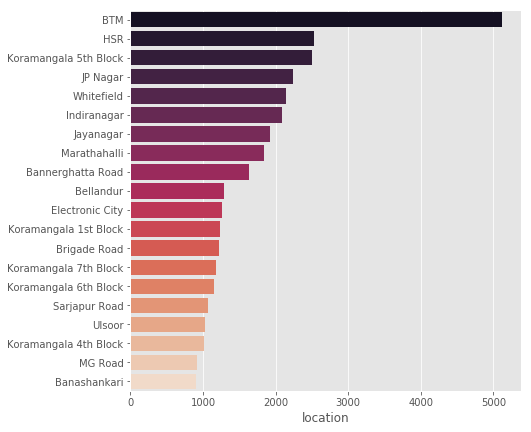

In [19]:
plt.figure(figsize=(7,7))
Rest_locations=df['location'].value_counts()[:20]
sns.barplot(Rest_locations,Rest_locations.index,palette="rocket")

**Objective:**

Kita bisa tahu bahwa blok BTM, HSR dan Koramangala ke-5 memiliki jumlah restoran terbanyak.
BTM mendominasi bagian dengan memiliki lebih dari 5000 restoran.

**Setelah mengetahui daftar restaurant dan lokasinya, maka kali ini kita akan mencari tahu makanan apa yang diminati**

In [20]:
df_1=df.groupby(['location','cuisines']).agg('count')
data=df_1.sort_values(['url'],ascending=False).groupby(['location'],
                as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})

data.head(12)

level_0           location               cuisines  count
0         0                BTM  North Indian, Chinese    379
1         0                BTM           North Indian    340
2         0                BTM                Biryani    120
3         1       Banashankari           South Indian     86
4         1       Banashankari  North Indian, Chinese     61
5         1       Banashankari           North Indian     36
6         2          Banaswadi           South Indian     37
7         2          Banaswadi  North Indian, Chinese     24
8         2          Banaswadi                Biryani     23
9         3  Bannerghatta Road  North Indian, Chinese    130
10        3  Bannerghatta Road           North Indian     75
11        3  Bannerghatta Road                 Bakery     50

**Objective:**

Data di atas adalah top 3 berdasarkan masing-masing makanan yang diminati berdasarkan lokasinya

**Lalu sebenarnya makanan apa saja yang paling popular di Bangalore?**

Text(0.5,1,'Most popular cuisines of Bangalore')

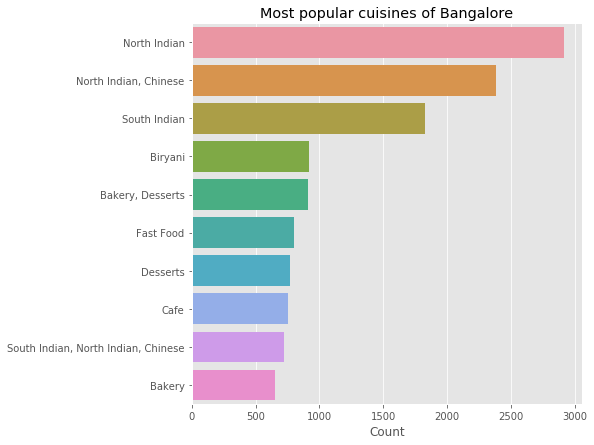

In [21]:
plt.figure(figsize=(7,7))
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

**Objective:**

Kita dapat mengamati bahwa North Indian, Cina, South Indian, dan Biryani adalah yang paling umum

## **Analysing Restaurant chains**

In [22]:
def produce_chains(name):
    data_chain=pd.DataFrame(df[df["name"]==name]['location'].value_counts().reset_index())
    data_chain.columns=['Name','count']
    data_chain=data_chain.merge(locations,on="Name",how="left").dropna()
    data_chain['lan'],data_chain['lon']=zip(*data_chain['geo_loc'].values)
    return data_chain[['Name','count','lan','lon']]

In [23]:
df_1=df.groupby(['rest_type','name']).agg('count')
datas=df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],
                as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})

In [24]:
mapbox_access_token="pk.eyJ1Ijoic2hhaHVsZXMiLCJhIjoiY2p4ZTE5NGloMDc2YjNyczBhcDBnZnA5aCJ9.psBECQ2nub0o25PgHcU88w"

**Top Cafe restaurant chains in Banglore**

In [25]:
cafe=datas[datas['rest_type']=='Cafe']
cafe

level_0 rest_type                 name  count
41       19      Cafe      Cafe Coffee Day     96
42       19      Cafe  Smally's Resto Cafe     54
43       19      Cafe         Mudpipe Cafe     39

**Objective:**

Tidak mengherankan, restoran Cafe Coffee Day mendominasi jauh di atas Cafe lainnya di Banglore.
Cafe coffee day memiliki 96 outlet di Banglore.
Café Coffee Day dimulai sebagai restoran ritel pada tahun 1996. Outlet CCD pertama didirikan pada 11 Juli 1996, di Brigade Road, Bengaluru, Karnataka.

**Top quick bites restaurant chains in Banglore**

In [26]:
quick=datas[datas['rest_type']=='Quick Bites']
quick

level_0    rest_type               name  count
179       78  Quick Bites  Five Star Chicken     69
180       78  Quick Bites     Domino's Pizza     60
181       78  Quick Bites         McDonald's     59

**Objective:**

Ternyata Five star chicken mendominasi dalam jenis quick bites restoran, mengungguli Domino's Pizza yang terkenal dan McDonald's.
Five Star Chicken adalah cabang dari Charoen Pokphand Group Foods, konglomerat multinasional Thailand dengan bisnis lebih dari $ 12 miliar di Agro dan Industri Makanan. Five Star Chicken spesialisasi dalam ayam goreng.

**Wordcloud dari hidangan yang disukai berdasarkan jenis makanannya**

In [27]:
df['dish_liked']=df['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])
#x=df.groupby('rest_type',as_index=False)['dish_liked'].agg('sum')
#x['dish_liked']=x['dish_liked'].apply(lambda x : list(filter(lambda a : a!='',x)))

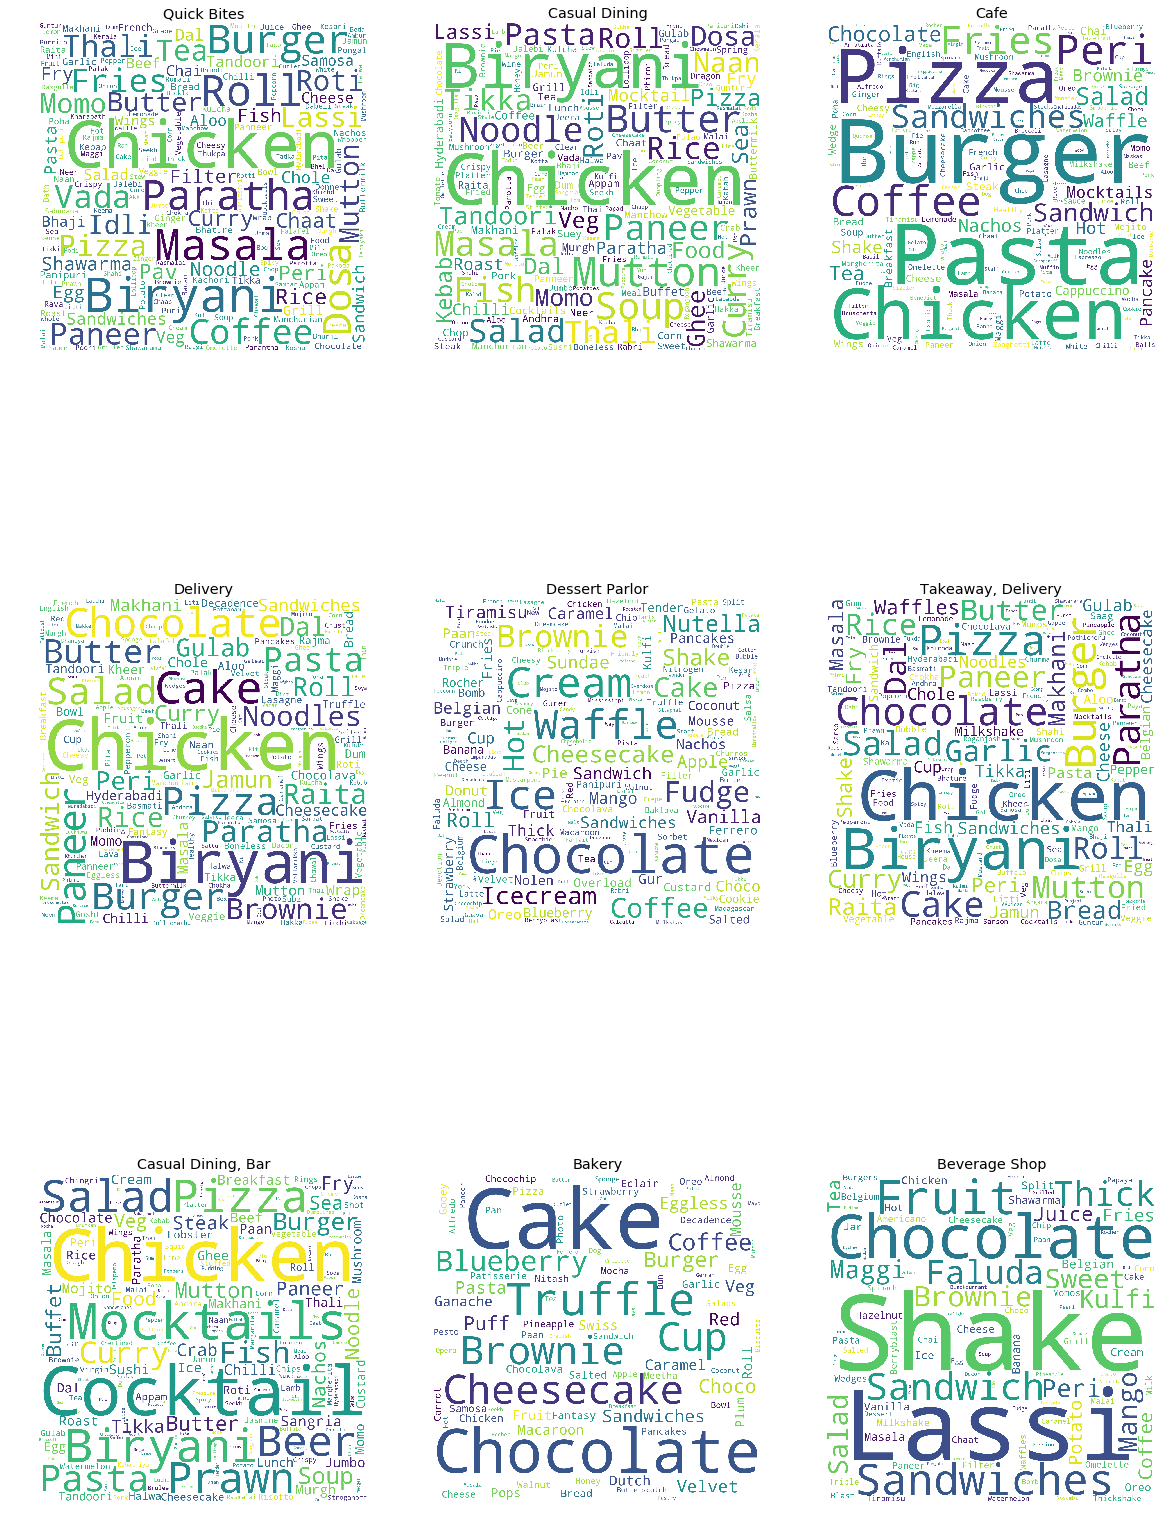

In [28]:
rest=df['rest_type'].value_counts()[:9].index
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,r in enumerate(rest):
        plt.subplot(3,3,i+1)
        corpus=df[df['rest_type']==r]['dish_liked'].values.tolist()
        corpus=','.join(x  for list_words in corpus for x in list_words)
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1500, height=1500).generate(corpus)
        plt.imshow(wordcloud)
        plt.title(r)
        plt.axis("off")
        

        
        
produce_wordcloud(rest)

## **Analysing Reviews**

*Pada bagian ini kita akan melanjutkan untuk mempersiapkan kerangka data review. Kita akan mengekstraksi review dan rating masing-masing restoran dan membuat kerangka data*

In [29]:
all_ratings = []

for name,ratings in tqdm(zip(df['name'],df['reviews_list'])):
    ratings = eval(ratings)
    for score, doc in ratings:
        if score:
            score = score.strip("Rated").strip()
            doc = doc.strip('RATED').strip()
            score = float(score)
            all_ratings.append([name,score, doc])

51717it [00:39, 1308.88it/s]


In [30]:
rating_df=pd.DataFrame(all_ratings,columns=['name','rating','review'])
rating_df['review']=rating_df['review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x))

In [31]:
rating_df.to_csv("Ratings.csv")

In [32]:
rating_df.head()

name  rating                                             review
0  Jalsa     4.0  A beautiful place to dine inThe interiors take...
1  Jalsa     4.0  I was here for dinner with my family on a week...
2  Jalsa     2.0  Its a restaurant near to Banashankari BDA Me a...
3  Jalsa     4.0  We went here on a weekend and one of us had th...
4  Jalsa     5.0  The best thing about the place is its ambiance...

**WordCloud of Reviews of restaurant chains**

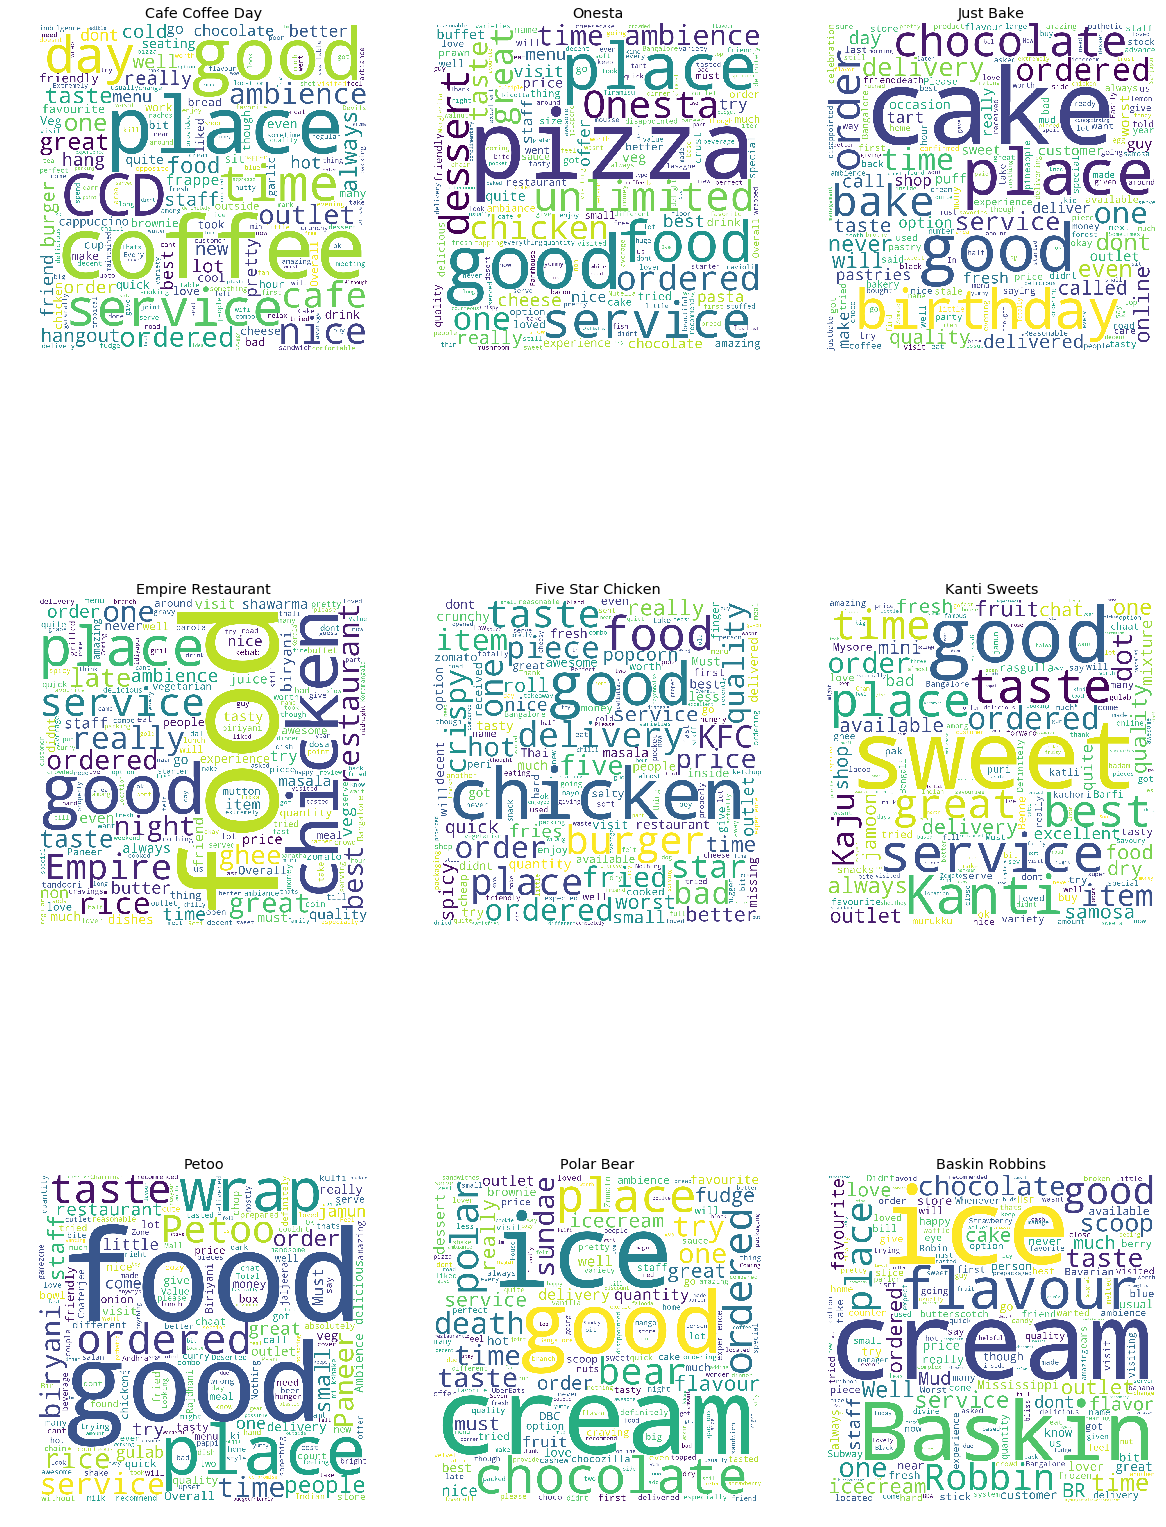

In [33]:
rest=df['name'].value_counts()[:9].index
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,r in enumerate(rest):
        plt.subplot(3,3,i+1)
        corpus=rating_df[rating_df['name']==r]['review'].values.tolist()
        corpus=' '.join(x  for x in corpus)
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1500, height=1500).generate(corpus)
        plt.imshow(wordcloud)
        plt.title(r)
        plt.axis("off")
        

        
        
produce_wordcloud(rest)

**Rating distribution**

Text(0,0.5,'count')

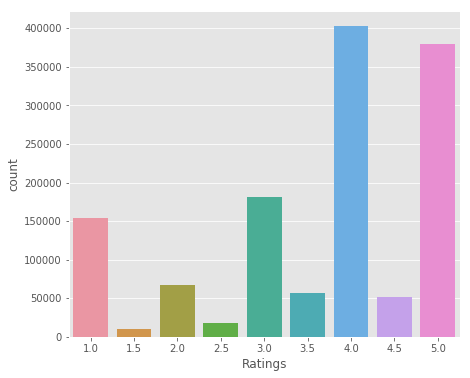

In [34]:
plt.figure(figsize=(7,6))
rating=rating_df['rating'].value_counts()
sns.barplot(x=rating.index,y=rating)
plt.xlabel("Ratings")
plt.ylabel('count')

**Topic modelling**

Kita akan melakukan pemodelan topik untuk komentar positif dan negatif secara terpisah untuk memahami perbedaan antara kedua jenis.

**Topic modeling for positive comments**

Sebagai langkah pertama kita akan membagi komentar negatif dan positif berdasarkan rating yang diberikan.
Komentar dengan rating di bawah 2.5 diklasifikasikan sebagai negatif dan lebih besar dari 2.5 diklasifikasikan sebagai positif.

In [35]:
rating_df['sent']=rating_df['rating'].apply(lambda x: 1 if int(x)>2.5 else 0)
rating_df['sent'].head()

0    1
1    1
2    0
3    1
4    1
Name: sent, dtype: int64

Sekarang,

- kami akan menghapus stopwords
- Lemmatize setiap kata
- Buat corpus
- Tokenize

In [36]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
stops=stopwords.words('English')
lem=WordNetLemmatizer()
corpus=' '.join(lem.lemmatize(x) for x in rating_df[rating_df['sent']==1]['review'][:3000] if x not in stops)
tokens=word_tokenize(corpus)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Sekarang kita akan menggunakan Term Frequency Inverse frequency doc (Tf Idf) untuk membuat vektor token**

In [37]:
vect=TfidfVectorizer()
vect_fit=vect.fit(tokens)

In [38]:
id_map=dict((v,k) for k,v in vect.vocabulary_.items())
vectorized_data=vect_fit.transform(tokens)
gensim_corpus=gensim.matutils.Sparse2Corpus(vectorized_data,documents_columns=False)
ldamodel = gensim.models.ldamodel.LdaModel(gensim_corpus,id2word=id_map,num_topics=5,random_state=34,passes=25)

**Visualizing output**

**Word Counts of Topic Keywords**

Keyword merupakan hal yang penting jika kita sedang membahas review. Seberapa sering kata-kata itu muncul dalam sebuah review juga menarik untuk dilihat.

Mari kita plot jumlah kata dan bobot masing-masing keyword dalam grafik yang sama.

In [39]:
counter=Counter(corpus)
counter

Counter({'A': 1668,
         ' ': 142690,
         'b': 8601,
         'e': 78397,
         'a': 58759,
         'u': 16279,
         't': 52060,
         'i': 44831,
         'f': 14016,
         'l': 25518,
         'p': 12869,
         'c': 19694,
         'o': 47403,
         'd': 26784,
         'n': 36871,
         'T': 3437,
         'h': 29644,
         'r': 36692,
         's': 39034,
         'k': 6193,
         'y': 14680,
         'M': 920,
         'g': 12871,
         'j': 1302,
         'W': 947,
         'w': 11349,
         'C': 1069,
         'm': 13466,
         'v': 9471,
         'B': 1304,
         'I': 3148,
         'S': 1423,
         'F': 928,
         'G': 593,
         '\n': 5855,
         'P': 1085,
         'H': 547,
         'z': 2222,
         'Q': 103,
         'O': 690,
         'x': 1042,
         '8': 84,
         '5': 1254,
         'E': 457,
         'L': 424,
         'q': 1030,
         'J': 261,
         'D': 561,
         'Y': 184,
         'N'

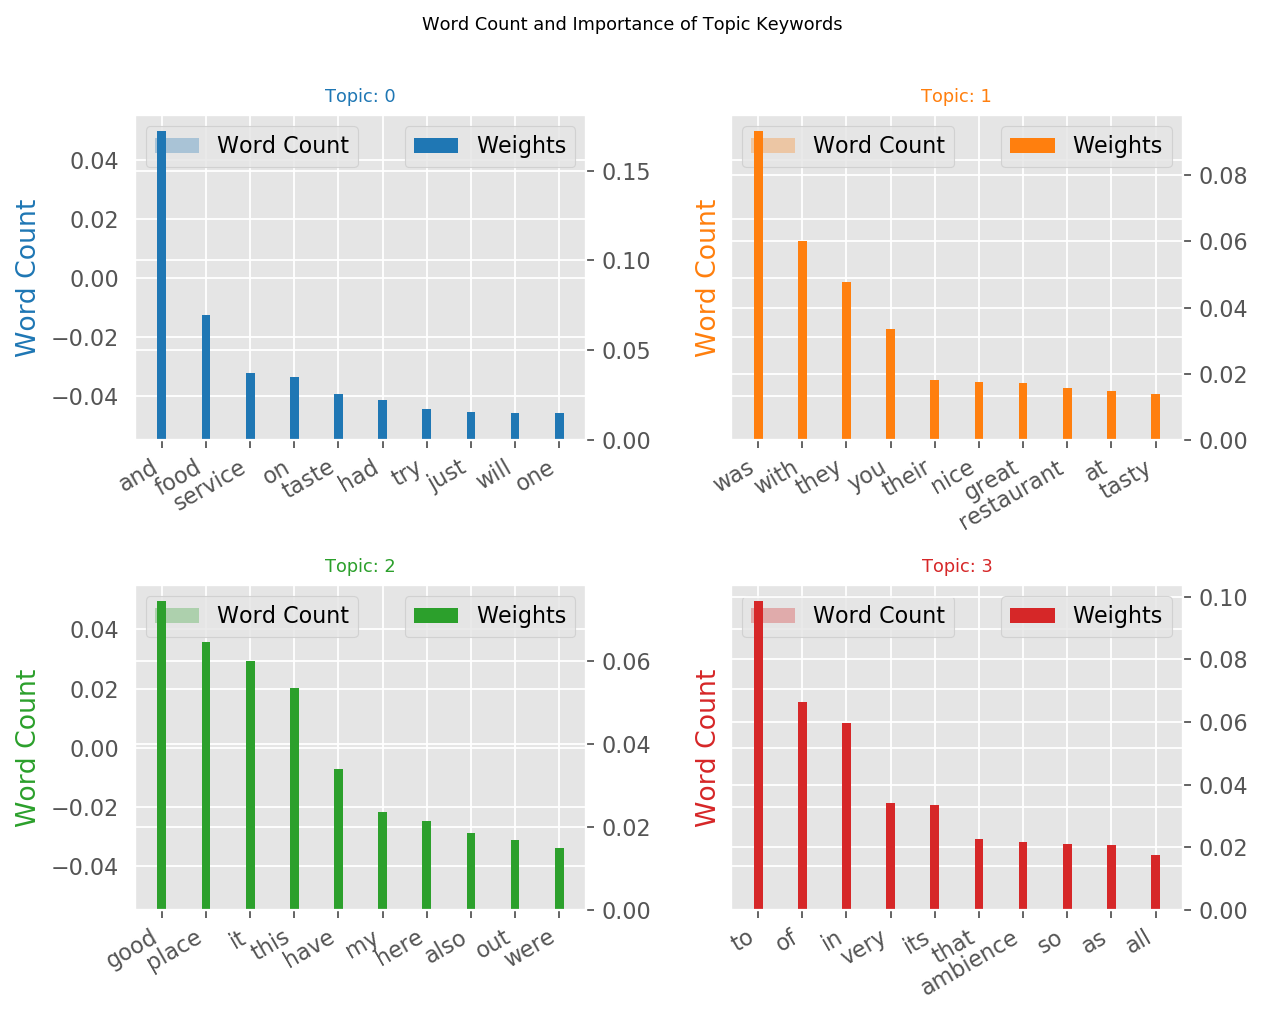

In [40]:
out=[]
topics=ldamodel.show_topics(formatted=False)
for i,topic in topics:
    for word,weight in topic:
        out.append([word,i,weight,counter[word]])

dataframe = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        


# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(8,6), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=dataframe.loc[dataframe.topic_id==i, :], color=cols[i], width=0.3, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=dataframe.loc[dataframe.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    #ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=8)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(dataframe.loc[dataframe.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=8, y=1.05)    
plt.show()

**Topic modeling for negative comments**

In [41]:
stops=stopwords.words('english')
lem=WordNetLemmatizer()
corpus=' '.join(lem.lemmatize(x) for x in rating_df[rating_df['sent']==0]['review'][:3000] if x not in stops)
tokens=word_tokenize(corpus)

In [42]:
vect=TfidfVectorizer()
vect_fit=vect.fit(tokens)
id_map=dict((v,k) for k,v in vect.vocabulary_.items())
vectorized_data=vect_fit.transform(tokens)
gensim_corpus=gensim.matutils.Sparse2Corpus(vectorized_data,documents_columns=False)
ldamodel = gensim.models.ldamodel.LdaModel(gensim_corpus,id2word=id_map,num_topics=5,random_state=34,passes=25)

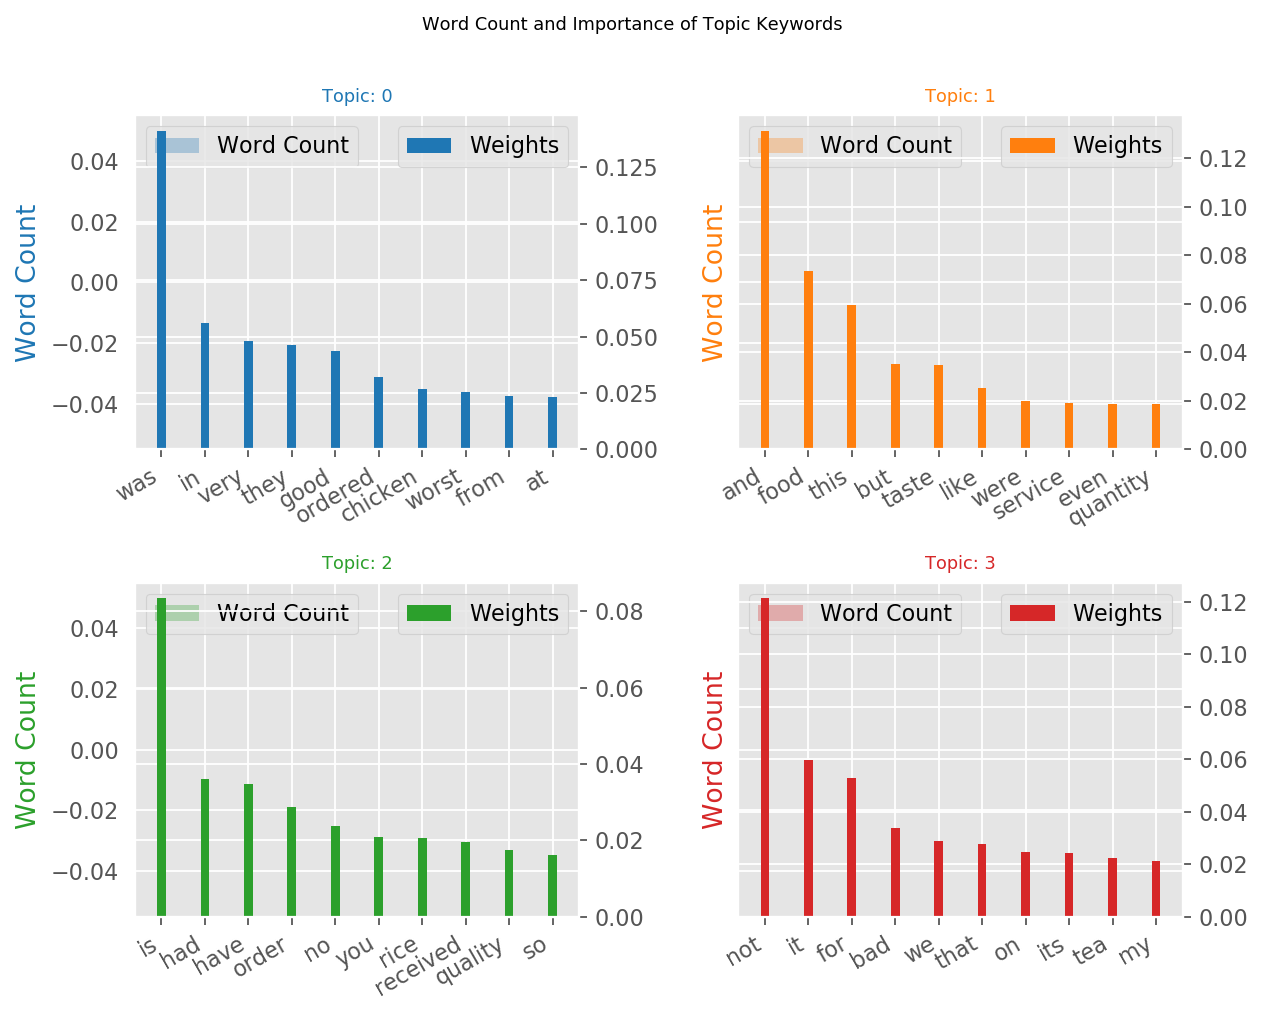

In [43]:
counter=Counter(corpus)
out=[]
topics=ldamodel.show_topics(formatted=False)
for i,topic in topics:
    for word,weight in topic:
        out.append([word,i,weight,counter[word]])

dataframe = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        


# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(8,6), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=dataframe.loc[dataframe.topic_id==i, :], color=cols[i], width=0.3, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=dataframe.loc[dataframe.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    #ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=8)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(dataframe.loc[dataframe.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=8, y=1.05)    
plt.show()

- Kita dapat dengan jelas mengamati perbedaan antara kedua jenis komentar
- Kata-kata yang digunakan jelas dapat dibedakan.
- Kata-kata yang digunakan dalam komentar negatif jelas mengkritik.
- Kata yang digunakan dalam komentar positif jelas menghargai.

**T-SNE of Reviews**

(t-SNE) t-Distributed Stochastic Neighbor Embedding adalah algoritma pengurangan dimensi non-linear yang digunakan untuk mengeksplorasi data dimensi tinggi. Algoritma ini memetakan data multi-dimensi ke dua atau lebih dimensi yang cocok untuk pengamatan manusia. Dengan bantuan algoritma t-SNE, Anda mungkin harus memplot lebih sedikit plot analisis data eksplorasi saat Anda bekerja dengan data dimensi tinggi.
Di bagian ini kita akan memvisualisasikan kata-kata yang digunakan dalam ulasan dalam ruang 2 dimensi.

Untuk itu, pertama-tama kita akan lemmatize dan tokenize setiap ulasan dan membangun sebuah corpus dari itu

In [44]:
stops=set(stopwords.words('english'))
lem=WordNetLemmatizer()
corpus=[]
for review in tqdm(rating_df['review'][:10000]):
    words=[]
    for x in word_tokenize(review):
        x=lem.lemmatize(x.lower())
        if x not in stops:
            words.append(x)
            
    corpus.append(words)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1337.24it/s]


**Sekarang kita akan menggunakan word2vec untuk mewakili setiap kata sebagai vektor**

In [45]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)

In [46]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



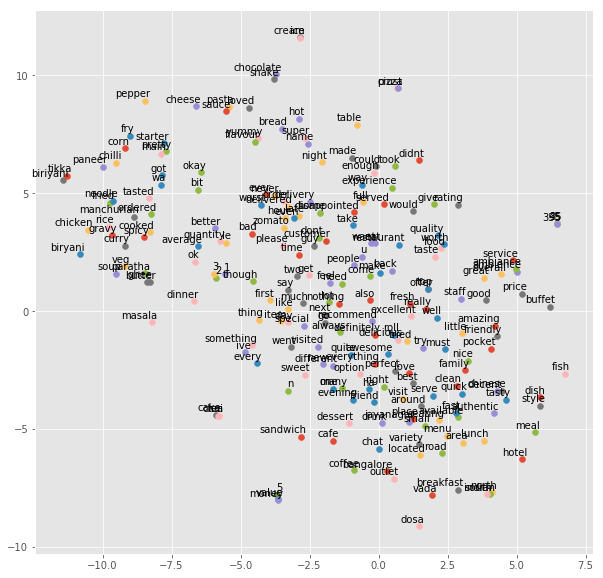

In [47]:
tsne_plot(model)

**T-SNE of adjectivs used in postive reviews**

In [48]:
postive=rating_df[rating_df['rating']>3]['review'][:2000]
negative=rating_df[rating_df['rating']<2.5]['review'][:2000]

def return_corpus(df):
    corpus=[]
    for review in df:
        tagged=nltk.pos_tag(word_tokenize(review))
        adj=[]
        for x in tagged:
            if x[1]=='JJ':
                adj.append(x[0])
        corpus.append(adj)
    return corpus

**Kita dapat mengamati semua kata sifat yang digunakan dalam ulasan positif yang direpresentasikan dalam ruang 2D**

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



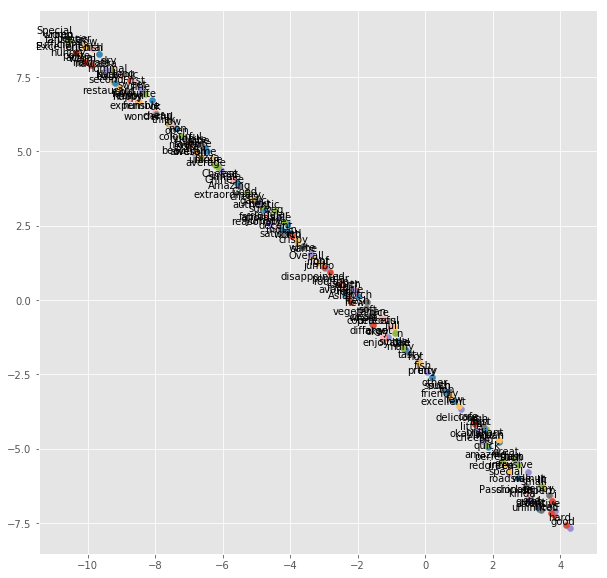

In [49]:
nltk.download('averaged_perceptron_tagger')
corpus=return_corpus(postive)
model = word2vec.Word2Vec(corpus, size=100, min_count=10,window=20, workers=4)
tsne_plot(model)

**T-SNE of adjectives used in Negative reviews**

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



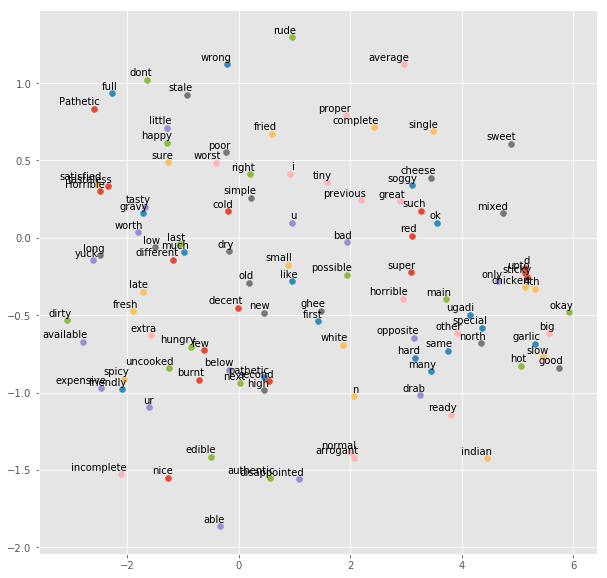

In [50]:
corpus=return_corpus(negative)
model = word2vec.Word2Vec(corpus, size=100, min_count=10,window=20, workers=4)
tsne_plot(model)

**Sentimental Analysis**

Analisis Sentimen adalah proses penentuan secara komputasional apakah suatu karya tulis positif, negatif atau netral. Metode juga dikenal sebagai penambangan opini, yang berasal dari pendapat atau sikap pembicara.

**Data preparation**

Untuk melakukan analisis sentimental kita harus menyiapkan data dalam format yang sesuai. Kita akan memetakan ulasan menjadi positif dan negatif berdasarkan rating yang diberikan oleh masing-masing customer. Jadi, ulasan menjadi negatif jika rating yang diberikan kurang dari 2,5 dan positif jika rating lebih besar dari 2,5

In [51]:
rating_df['sent']=rating_df['rating'].apply(lambda x: 1 if int(x)>2.5 else 0)
rating_df['sent'].head()

0    1
1    1
2    0
3    1
4    1
Name: sent, dtype: int64

**Selanjutnya, kami akan melakukan tokenize pada data dan membuat vektor pada ulasan untuk mengumpankannya ke dalam model**

In [52]:
max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(rating_df['review'].values)
X = tokenizer.texts_to_sequences(rating_df['review'].values)
X = pad_sequences(X)

**Building Model**

In [53]:
embed_dim = 32
lstm_out = 32

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
#model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 194, 32)           96000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 104,386
Trainable params: 104,386
Non-trainable params: 0
_________________________________________________________________
None


**Train and test split**

- Hal pertama yang dilakukan adalah encode variable data. Cara yang saya lakukan adalah dengan get_dummies
- 30 persen data dicadangkan untuk menguji model kami

In [54]:
Y = pd.get_dummies(rating_df['sent'].astype(int)).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(923977, 194) (923977, 2)
(395991, 194) (395991, 2)


In [127]:
batch_size = 3200
model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
652800/884378 [=====================>........] - ETA: 49:01 - loss: 0.6963 - acc: 0.38 - ETA: 37:33 - loss: 0.6939 - acc: 0.48 - ETA: 31:01 - loss: 0.6916 - acc: 0.56 - ETA: 27:37 - loss: 0.6893 - acc: 0.62 - ETA: 25:20 - loss: 0.6869 - acc: 0.65 - ETA: 23:56 - loss: 0.6846 - acc: 0.68 - ETA: 23:02 - loss: 0.6822 - acc: 0.70 - ETA: 22:45 - loss: 0.6795 - acc: 0.71 - ETA: 22:46 - loss: 0.6770 - acc: 0.72 - ETA: 22:45 - loss: 0.6743 - acc: 0.73 - ETA: 22:47 - loss: 0.6714 - acc: 0.74 - ETA: 22:48 - loss: 0.6685 - acc: 0.74 - ETA: 22:55 - loss: 0.6654 - acc: 0.75 - ETA: 22:56 - loss: 0.6620 - acc: 0.75 - ETA: 23:00 - loss: 0.6586 - acc: 0.76 - ETA: 23:03 - loss: 0.6551 - acc: 0.76 - ETA: 23:02 - loss: 0.6512 - acc: 0.76 - ETA: 23:01 - loss: 0.6472 - acc: 0.76 - ETA: 23:03 - loss: 0.6428 - acc: 0.77 - ETA: 23:03 - loss: 0.6381 - acc: 0.77 - ETA: 23:07 - loss: 0.6333 - acc: 0.77 - ETA: 23:07 - loss: 0.6288 - acc: 0.77 - ETA: 23:11 - 

652800/884378 [=====================>........] - ETA: 51:05 - loss: 0.1734 - acc: 0.93 - ETA: 52:08 - loss: 0.1737 - acc: 0.93 - ETA: 51:26 - loss: 0.1664 - acc: 0.93 - ETA: 51:22 - loss: 0.1672 - acc: 0.93 - ETA: 51:18 - loss: 0.1674 - acc: 0.93 - ETA: 51:03 - loss: 0.1662 - acc: 0.93 - ETA: 51:06 - loss: 0.1678 - acc: 0.93 - ETA: 50:48 - loss: 0.1679 - acc: 0.93 - ETA: 50:37 - loss: 0.1682 - acc: 0.93 - ETA: 50:24 - loss: 0.1676 - acc: 0.93 - ETA: 50:12 - loss: 0.1677 - acc: 0.93 - ETA: 50:14 - loss: 0.1677 - acc: 0.93 - ETA: 50:04 - loss: 0.1670 - acc: 0.93 - ETA: 50:01 - loss: 0.1677 - acc: 0.93 - ETA: 49:59 - loss: 0.1678 - acc: 0.93 - ETA: 49:41 - loss: 0.1678 - acc: 0.93 - ETA: 49:31 - loss: 0.1675 - acc: 0.93 - ETA: 49:17 - loss: 0.1676 - acc: 0.93 - ETA: 49:00 - loss: 0.1679 - acc: 0.93 - ETA: 48:48 - loss: 0.1677 - acc: 0.93 - ETA: 48:32 - loss: 0.1673 - acc: 0.93 - ETA: 48:20 - loss: 0.1668 - acc: 0.93 - ETA: 48:10 - loss: 0.1671 - acc: 0.93 - ETA: 47:55 - loss: 0.1671 - acc

884378/884378 [==============================] - ETA: 13:26 - loss: 0.1573 - acc: 0.93 - ETA: 13:15 - loss: 0.1573 - acc: 0.93 - ETA: 13:04 - loss: 0.1573 - acc: 0.93 - ETA: 12:52 - loss: 0.1572 - acc: 0.93 - ETA: 12:41 - loss: 0.1572 - acc: 0.93 - ETA: 12:30 - loss: 0.1572 - acc: 0.93 - ETA: 12:19 - loss: 0.1572 - acc: 0.93 - ETA: 12:07 - loss: 0.1571 - acc: 0.93 - ETA: 11:56 - loss: 0.1571 - acc: 0.93 - ETA: 11:45 - loss: 0.1570 - acc: 0.93 - ETA: 11:33 - loss: 0.1569 - acc: 0.93 - ETA: 11:22 - loss: 0.1569 - acc: 0.93 - ETA: 11:11 - loss: 0.1569 - acc: 0.93 - ETA: 10:59 - loss: 0.1569 - acc: 0.93 - ETA: 10:48 - loss: 0.1568 - acc: 0.93 - ETA: 10:37 - loss: 0.1567 - acc: 0.93 - ETA: 10:25 - loss: 0.1566 - acc: 0.93 - ETA: 10:14 - loss: 0.1566 - acc: 0.93 - ETA: 10:03 - loss: 0.1566 - acc: 0.93 - ETA: 9:52 - loss: 0.1566 - acc: 0.9396 - ETA: 9:40 - loss: 0.1565 - acc: 0.939 - ETA: 9:29 - loss: 0.1565 - acc: 0.939 - ETA: 9:18 - loss: 0.1564 - acc: 0.939 - ETA: 9:06 - loss: 0.1563 - acc

652800/884378 [=====================>........] - ETA: 52:12 - loss: 0.1445 - acc: 0.94 - ETA: 51:19 - loss: 0.1468 - acc: 0.94 - ETA: 51:31 - loss: 0.1411 - acc: 0.94 - ETA: 51:29 - loss: 0.1396 - acc: 0.94 - ETA: 51:05 - loss: 0.1390 - acc: 0.94 - ETA: 50:56 - loss: 0.1369 - acc: 0.94 - ETA: 50:41 - loss: 0.1356 - acc: 0.94 - ETA: 50:40 - loss: 0.1359 - acc: 0.94 - ETA: 50:34 - loss: 0.1356 - acc: 0.94 - ETA: 50:16 - loss: 0.1362 - acc: 0.94 - ETA: 50:07 - loss: 0.1365 - acc: 0.94 - ETA: 49:54 - loss: 0.1345 - acc: 0.94 - ETA: 49:44 - loss: 0.1351 - acc: 0.94 - ETA: 49:36 - loss: 0.1353 - acc: 0.94 - ETA: 49:22 - loss: 0.1346 - acc: 0.94 - ETA: 49:13 - loss: 0.1340 - acc: 0.94 - ETA: 48:59 - loss: 0.1342 - acc: 0.94 - ETA: 48:49 - loss: 0.1335 - acc: 0.94 - ETA: 48:40 - loss: 0.1324 - acc: 0.94 - ETA: 48:26 - loss: 0.1326 - acc: 0.94 - ETA: 48:17 - loss: 0.1335 - acc: 0.94 - ETA: 48:04 - loss: 0.1331 - acc: 0.94 - ETA: 47:53 - loss: 0.1329 - acc: 0.94 - ETA: 47:44 - loss: 0.1328 - acc

884378/884378 [==============================] - ETA: 13:05 - loss: 0.1289 - acc: 0.95 - ETA: 12:53 - loss: 0.1289 - acc: 0.95 - ETA: 12:40 - loss: 0.1289 - acc: 0.95 - ETA: 12:28 - loss: 0.1289 - acc: 0.95 - ETA: 12:16 - loss: 0.1289 - acc: 0.95 - ETA: 12:04 - loss: 0.1288 - acc: 0.95 - ETA: 11:52 - loss: 0.1288 - acc: 0.95 - ETA: 11:40 - loss: 0.1287 - acc: 0.95 - ETA: 11:28 - loss: 0.1287 - acc: 0.95 - ETA: 11:16 - loss: 0.1287 - acc: 0.95 - ETA: 11:04 - loss: 0.1287 - acc: 0.95 - ETA: 10:52 - loss: 0.1287 - acc: 0.95 - ETA: 10:40 - loss: 0.1287 - acc: 0.95 - ETA: 10:28 - loss: 0.1288 - acc: 0.95 - ETA: 10:17 - loss: 0.1288 - acc: 0.95 - ETA: 10:05 - loss: 0.1288 - acc: 0.95 - ETA: 9:53 - loss: 0.1288 - acc: 0.9509 - ETA: 9:42 - loss: 0.1288 - acc: 0.950 - ETA: 9:30 - loss: 0.1288 - acc: 0.950 - ETA: 9:19 - loss: 0.1288 - acc: 0.950 - ETA: 9:07 - loss: 0.1287 - acc: 0.950 - ETA: 8:56 - loss: 0.1288 - acc: 0.950 - ETA: 8:44 - loss: 0.1287 - acc: 0.951 - ETA: 8:33 - loss: 0.1287 - acc

**Validating our model**

Untuk memvalidasi modelnya, Saya mencoba mengambil 1500 baris data. Lalu parameter yang digunakan untuk menjadi kriteria evaluasi adalah nilai akurasinya

In [128]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 0.11
acc: 0.96
